In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.utils import normalize


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackathon2021/sample_submission.csv
/kaggle/input/hackathon2021/train.csv/train.csv
/kaggle/input/hackathon2021/test.csv/test.csv


In [2]:
#reading train.csv and test.csv files
trainset=pd.read_csv('/kaggle/input/hackathon2021/train.csv/train.csv')
testset=pd.read_csv('/kaggle/input/hackathon2021/test.csv/test.csv')
#extracting 'label' from train.csv i.e.., trainset
trainlabel=trainset['label'].copy()
#deleting 'label' from train.csv i.e.., trainset
trainset.drop(['label'],axis=1,inplace=True)
#trainset.head() #displaying the trainset after dropping 'label' from the dataframe

In [3]:
#converting dataframes of trainset into arrays using numpy
trainset=np.array(trainset)
#reshaping the trainset from(42000,784) to (42000,28,28,1)
trainset=trainset.reshape(42000,28,28,1)
#converting dataframes of testset into arrays using numpy
testset=np.array(testset)
#reshaping testset from (28000,784) to (28000,28,28,1)
testset=testset.reshape(28000,28,28,1)
print(trainset.shape)
print(testset.shape)


(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [4]:
#normalizing the training and testing sets using an inbuilt method "normalize()" without actually dividing by 255.0
trainset=normalize(trainset,axis=1)
testset=normalize(testset,axis=1)
#print(trainset[0]) #now the values lie between 0-1

In [5]:
#Building a DEEP NEURAL NETWORK
model=Sequential()
#CONVOLUTION LAYER-1
model.add(Conv2D(64,(3,3),input_shape=trainset.shape[1:])) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#CONVULTION LAYER-2
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#CONVULTION LAYER -3
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


#FULLY CONNECTED LAYER-1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
#FULLY CONNECTED LAYER-2
model.add(Dense(32))
model.add(Activation("relu"))
#FULLY CONNECTED LAYER-3
model.add(Dense(10))
model.add(Activation("softmax"))

In [6]:
#Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [7]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#Training the model
model.fit(trainset,trainlabel,epochs=3)

Epoch 1/3
1313/1313 [==============================] - 34s 25ms/step - loss: 0.6936 - accuracy: 0.7704
Epoch 2/3
1313/1313 [==============================] - 33s 25ms/step - loss: 0.1039 - accuracy: 0.9691
Epoch 3/3
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0743 - accuracy: 0.9768


8


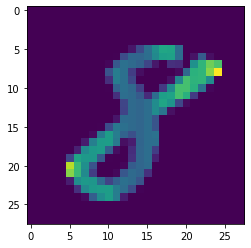

In [8]:
#testing the model with a sample testset input
plt.imshow(testset[278])
predi=model.predict(testset)
print(np.argmax(predi[278]))

In [9]:
finallabel=predi.argmax(axis=-1)
#creating the dataframe for submission file
sub_file=pd.DataFrame()
sub_file["ImageID"]=list(range(1,len(testset)+1))
sub_file["Label"]=finallabel
#displaying the submissionfile
print(sub_file)

#converting the submission file into csv
sub_file.to_csv("submission_file.csv",index=False)

       ImageID  Label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]
